In [5]:
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing import image

import numpy as np
import easygui 

ModuleNotFoundError: No module named 'easygui'

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_set = train_datagen.flow_from_directory(
        './train_dataset',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 751 images belonging to 30 classes.


In [7]:
test_datagen = ImageDataGenerator(
        rescale=1./255)
test_set = train_datagen.flow_from_directory(
        './test_dataset',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 306 images belonging to 30 classes.


In [8]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape=[128,128,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 ,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 ,strides=2))
cnn.add(tf.keras.layers.Flatten()) 
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 30, activation = 'softmax'))
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
epoch=40
history=cnn.fit(x = train_set, validation_data = test_set, epochs = epoch)




Epoch 1/40


24/24 [==============================] - 11s 396ms/step - loss: 3.5020 - accuracy: 0.0719 - val_loss: 3.1338 - val_accuracy: 0.2157
Epoch 2/40
24/24 [==============================] - 8s 326ms/step - loss: 2.8083 - accuracy: 0.2290 - val_loss: 2.4493 - val_accuracy: 0.2974
Epoch 3/40
24/24 [==============================] - 7s 296ms/step - loss: 2.1733 - accuracy: 0.3768 - val_loss: 1.8991 - val_accuracy: 0.4412
Epoch 4/40
24/24 [==============================] - 7s 299ms/step - loss: 1.7183 - accuracy: 0.4874 - val_loss: 1.7844 - val_accuracy: 0.4935
Epoch 5/40
24/24 [==============================] - 7s 293ms/step - loss: 1.4075 - accuracy: 0.5712 - val_loss: 1.5890 - val_accuracy: 0.5196
Epoch 6/40
24/24 [==============================] - 7s 300ms/step - loss: 1.2456 - accuracy: 0.6085 - val_loss: 1.4150 - val_accuracy: 0.5915
Epoch 7/40
24/24 [==============================] - 7s 297ms/step - loss: 1.2182 - accuracy: 0.6312 - val_loss: 1.4491 - val_accuracy: 0.5556


In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [10]:
cnn.save('Models.h5')

C:\Users\ASUS\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


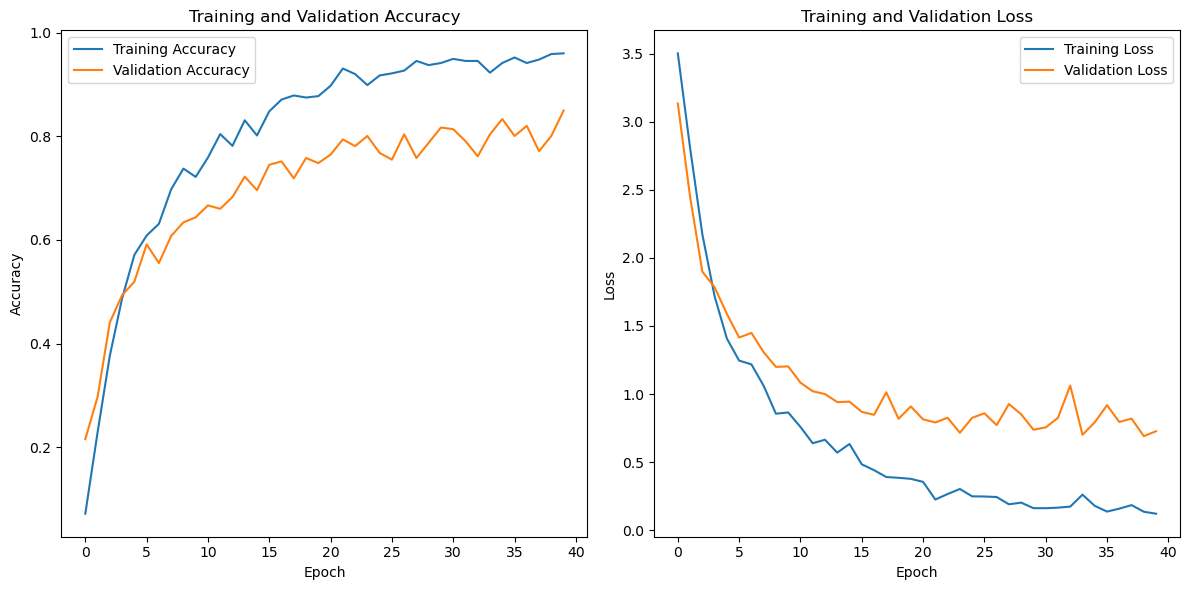

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [12]:
image1=easygui.fileopenbox()
test_image=image.load_img(image1,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
print(result)

NameError: name 'easygui' is not defined

In [ ]:
cnn.evaluate(test_set)